Проект e-learning: вариант 2, Кубыш Марк

In [239]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

%matplotlib inline 

In [240]:
assessments         = pd.read_csv(r'C:\Users\user\Desktop\KARPOV\prom_project\assessments.csv', sep=',')
courses             = pd.read_csv(r'C:\Users\user\Desktop\KARPOV\prom_project\courses.csv', sep=',')
studentAssessment   = pd.read_csv(r'C:\Users\user\Desktop\KARPOV\prom_project\studentAssessment.csv', sep=',')
studentRegistration = pd.read_csv(r'C:\Users\user\Desktop\KARPOV\prom_project\studentRegistration.csv', sep=',')

In [241]:
assessments.head()
#assessments.csv — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).
#code_module — идентификационный код предмета.
#code_presentation — семестр (Идентификационный код).
#id_assessment — тест (Идентификационный номер ассессмента).
#assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).
#date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).
#weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) 

In [244]:
# выявим id экзаменов
exams_info = assessments.query('assessment_type == "Exam"').reset_index()[['code_module', 'code_presentation', 'id_assessment']]
exams_info

,code_module,code_presentation,id_assessment
0,AAA,2013J,1757
1,AAA,2014J,1763
2,BBB,2013B,14990
3,BBB,2013J,15002
4,BBB,2014B,15014
5,BBB,2014J,15025
6,CCC,2014B,24290
7,CCC,2014B,40087
8,CCC,2014J,24299
9,CCC,2014J,40088


In [6]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [245]:
# отфильтруем студентов и их оценки только за экзамены
student_exams = studentAssessment.merge(exams_info, how='inner', on='id_assessment')
student_exams.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation
0,24290,558914,230,0,32.0,CCC,2014B
1,24290,559706,234,0,78.0,CCC,2014B
2,24290,559770,230,0,54.0,CCC,2014B
3,24290,560114,230,0,64.0,CCC,2014B
4,24290,560311,234,0,100.0,CCC,2014B


In [8]:
# отберем студентов, сдавших ровно 1 экзамен на 40 баллов и лучше

student_exams.query('score >= 40') \
    .groupby('id_student', as_index=False).agg({'id_assessment':'count'}) \
    .query('id_assessment == 1')

,id_student,id_assessment
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4092,2694886,1
4093,2694933,1
4094,2695608,1
4095,2697181,1


In [9]:
courses
#courses.csv — файл содержит список предметов по семестрам.

#code_module — предмет (идентификационный код).
#code_presentation — семестр (идентификационный код).
#module_presentation_length — продолжительность семестра в днях.

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [10]:
studentAssessment.head()

#studentAssessment.csv — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

#id_assessment — тест (идентификационный номер).
#id_student — идентификационный номер студента.
#date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.
#is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).
#score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [12]:
studentRegistration.head()
#studentRegistration.csv — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.

#code_module — предмет (идентификационный код).
#code_presentation — семестр (идентификационный код)
#id_student — идентификационный номер студента.
#date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).
#date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [13]:
# 2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*.
# *завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [14]:
# данные с типами тестов и данные по оценкам за тесты в разных датафреймах. Объединим их:

difficulty = pd.merge(studentAssessment, assessments, on='id_assessment')
difficulty = difficulty.drop(['date_submitted', 'is_banked', 'date', 'weight'], axis=1)
difficulty.head()

,id_assessment,id_student,score,code_module,code_presentation,assessment_type
0,1752,11391,78.0,AAA,2013J,TMA
1,1752,28400,70.0,AAA,2013J,TMA
2,1752,31604,72.0,AAA,2013J,TMA
3,1752,32885,69.0,AAA,2013J,TMA
4,1752,38053,79.0,AAA,2013J,TMA


In [246]:
# посчитаем, сколько сдано всего тестов по каждому предмету
count_all_tests_df = difficulty.groupby('code_module', as_index=False).agg({'score':'count'}) \
    .rename(columns={'score':'count_all_tests'})
count_all_tests_df

,code_module,count_all_tests
0,AAA,3146
1,BBB,42979
2,CCC,18929
3,DDD,30815
4,EEE,7886
5,FFF,54769
6,GGG,15215


In [247]:
# посчитаем, сколько сдано тестов на сумму более 40 баллов по каждому предмету
count_succes_tests_df = difficulty.query('score >= 40').groupby('code_module', as_index=False).agg({'score':'count'}) \
    .rename(columns={'score':'count_succes_tests'})
count_succes_tests_df

,code_module,count_succes_tests
0,AAA,3056
1,BBB,41558
2,CCC,17169
3,DDD,28028
4,EEE,7746
5,FFF,53687
6,GGG,14917


In [248]:
# найдем процент завершаемости
count_all_tests_df['count_succes_tests'] = count_succes_tests_df.count_succes_tests
count_all_tests_df['percent_succes'] = count_all_tests_df.count_succes_tests / count_all_tests_df.count_all_tests * 100
count_all_tests_df

,code_module,count_all_tests,count_succes_tests,percent_succes
0,AAA,3146,3056,97.139224
1,BBB,42979,41558,96.693734
2,CCC,18929,17169,90.702097
3,DDD,30815,28028,90.955703
4,EEE,7886,7746,98.224702
5,FFF,54769,53687,98.024430
6,GGG,15215,14917,98.041407


In [18]:
# оценим, по каким предметам(курсам) есть экзамены в программе обучения

difficulty_of_exams = difficulty.query('assessment_type == "Exam"')
difficulty_of_exams.code_module.unique()

array(['CCC', 'DDD'], dtype=object)

In [19]:
# только в предметах(курсах) ССС и DDD есть экзамены

In [20]:
difficulty_of_exams.head()

,id_assessment,id_student,score,code_module,code_presentation,assessment_type
52923,24290,558914,32.0,CCC,2014B,Exam
52924,24290,559706,78.0,CCC,2014B,Exam
52925,24290,559770,54.0,CCC,2014B,Exam
52926,24290,560114,64.0,CCC,2014B,Exam
52927,24290,560311,100.0,CCC,2014B,Exam


In [249]:
# считаем завершаемость по предмету ССС
percent_succes_exam_CCC = difficulty_of_exams.query('code_module == "CCC"').query('score >= 40').score.shape[0] / difficulty_of_exams.query('code_module == "CCC"').shape[0] * 100
percent_succes_exam_CCC

87.88511749347259

In [250]:
# считаем завершаемость по предмету DDD
percent_succes_exam_DDD = difficulty_of_exams.query('code_module == "DDD"').query('score >= 40').score.shape[0] / difficulty_of_exams.query('code_module == "DDD"').shape[0] * 100
percent_succes_exam_DDD

88.99474375821288

In [252]:
# 3. По каждому предмету определим средний срок сдачи экзаменов

In [253]:
# считаем средний срок сдачи экзаменов для предметов ССС и DDD
student_exams.query('score >= 40').groupby('code_module').agg({'date_submitted':'mean'})

,date_submitted
code_module,
CCC,239.345217
DDD,237.976006


In [254]:
# посмотрим средний срок по тестам

In [255]:
mean_period_for_id_assessment = studentAssessment.query('score >= 40') \
    .groupby('id_assessment', as_index=False) \
    .agg({'date_submitted':'mean'}) \
    .rename(columns={'date_submitted':'mean_period'})
mean_period_for_id_assessment.head()

,id_assessment,mean_period
0,1752,19.295455
1,1753,55.606061
2,1754,117.236923
3,1755,167.153061
4,1756,214.572414


In [256]:
# посмотрим средний срок сдачи экз-на по семестрам

In [257]:
assessments_mean = assessments.merge(mean_period_for_id_assessment, on='id_assessment').query('assessment_type=="Exam"')
assessments_mean

,code_module,code_presentation,id_assessment,assessment_type,date,weight,mean_period
56,CCC,2014B,24290,Exam,NaN,100.0,231.581325
65,CCC,2014J,24299,Exam,NaN,100.0,244.404318
79,DDD,2013B,25340,Exam,240.0,100.0,230.164683
86,DDD,2013J,25354,Exam,261.0,100.0,239.509112
93,DDD,2014B,25361,Exam,241.0,100.0,234.936082
100,DDD,2014J,25368,Exam,NaN,100.0,242.804038


In [29]:
# 4. Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3).

In [30]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [258]:
# посчитаем число регистраций по предметам и отберем ТОП-3
studentRegistration.groupby('code_module', as_index=False) \
    .agg({'date_registration':'count'}) \
    .rename(columns={'date_registration':'number of registrations'}) \
    .sort_values(by='number of registrations', ascending=False) \
    .head(3)

,code_module,number of registrations
1,BBB,7900
5,FFF,7751
3,DDD,6257


In [259]:
# посчитаем число отмен регистраций по предметам и отберем ТОП-3
studentRegistration.groupby('code_module', as_index=False) \
    .agg({'date_unregistration':'count'}) \
    .rename(columns={'date_unregistration':'number of unregistrations'}) \
    .sort_values(by='number of unregistrations', ascending=False) \
    .head(3)

,code_module,number of unregistrations
5,FFF,2380
1,BBB,2377
3,DDD,2235


In [33]:
# 5. В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.

In [260]:
# посчитаем число попыток сдач тестов

df_all_count=studentAssessment.groupby('id_assessment', as_index=False) \
    .agg({'score':'count'}) \
    .rename(columns={'score':'all_count'})
df_all_count.head()

,id_assessment,all_count
0,1752,358
1,1753,342
2,1754,330
3,1755,303
4,1756,298


In [261]:
# посчитаем число успешных попыток сдач тестов

df_succ_count = studentAssessment.query('score >= 40') \
    .groupby('id_assessment', as_index=False) \
    .agg({'score':'count'}) \
    .rename(columns={'score':'succ_count'})
df_succ_count.head()

,id_assessment,succ_count
0,1752,352
1,1753,330
2,1754,325
3,1755,294
4,1756,290


In [262]:
# завершаемость = отношение успешных попыток к общему числу попыток

df_count = df_all_count.merge(df_succ_count, on='id_assessment')
df_count['finalizability'] = df_count.succ_count / df_count.all_count * 100
df_count

,id_assessment,all_count,succ_count,finalizability
0,1752,358,352,98.324022
1,1753,342,330,96.491228
2,1754,330,325,98.484848
3,1755,303,294,97.029703
4,1756,298,290,97.315436
...,...,...,...,...
183,37439,504,503,99.801587
184,37440,479,466,97.286013
185,37441,473,470,99.365751
186,37442,416,396,95.192308


In [37]:
# средний срок сдачи

mean_date = studentAssessment.groupby('id_assessment', as_index=False).agg({'date_submitted':'mean'})
mean_date.head()

,id_assessment,date_submitted
0,1752,19.356546
1,1753,55.959064
2,1754,117.235650
3,1755,167.303630
4,1756,214.543624


In [263]:
# объединим картину по завершаемости и среднемму сроку сдачи и посмотрим на данные после группировки по семестрам

In [264]:
finalizability_and_submitted = assessments.merge(df_count, how='left', on='id_assessment') \
    .merge(mean_date, how='left', on='id_assessment')
finalizability_and_submitted.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,all_count,succ_count,finalizability,date_submitted
0,AAA,2013J,1752,TMA,19.0,10.0,358.0,352.0,98.324022,19.356546
1,AAA,2013J,1753,TMA,54.0,20.0,342.0,330.0,96.491228,55.959064
2,AAA,2013J,1754,TMA,117.0,20.0,330.0,325.0,98.484848,117.235650
3,AAA,2013J,1755,TMA,166.0,20.0,303.0,294.0,97.029703,167.303630
4,AAA,2013J,1756,TMA,215.0,30.0,298.0,290.0,97.315436,214.543624


In [266]:
assessments.merge(df_count, how='left', on='id_assessment') \
    .merge(mean_date, how='left', on='id_assessment') \
    .groupby('code_presentation', as_index=False) \
    .agg({'finalizability':'mean', 'date_submitted':'mean'})

,code_presentation,finalizability,date_submitted
0,2013B,94.754201,121.099316
1,2013J,96.876294,129.144672
2,2014B,95.290103,125.681011
3,2014J,95.216488,128.611477


In [267]:
# 6. RFM анализ. метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен

In [268]:
# курс считаем завершенным успешно, если сданы все тесты (>= 40)


In [43]:
# сколько тестов содержится в каждом курсе

assessments.groupby('code_module', as_index=False).agg({'id_assessment':'count'})

,code_module,id_assessment
0,AAA,12
1,BBB,42
2,CCC,20
3,DDD,35
4,EEE,15
5,FFF,52
6,GGG,30


In [280]:
# отсеем академщиков (тк у них отрицательные значения в сроках сдачи, которые мешают расчетам) и заменим пропущенные значения на 0

studentAssessment_ = studentAssessment.query('is_banked == 0 and date_submitted > 0').fillna(0)
studentAssessment_.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [281]:
studentAssessment_.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [282]:
# сколько тестов сдавал каждый студент

number_of_tests_per_students = studentAssessment_.groupby('id_student', as_index=False).agg({'id_assessment':'count'}) \
    .rename(columns={'id_assessment':'number_tests'})
number_of_tests_per_students

,id_student,number_tests
0,6516,5
1,8462,3
2,11391,5
3,23629,4
4,23698,9
...,...,...
23294,2698251,7
23295,2698257,5
23296,2698535,8
23297,2698577,5


In [283]:
number_of_tests_per_students.isna().sum()

id_student      0
number_tests    0
dtype: int64

так как студенты сдают меньше тестов, чем есть в предмете, будем считать, что тесты студент сдает выборочно
завершаемость курса для сутдентов будем считать по отношению числа сданных студентом тестов (>= 40 баллов) к общему числу тестов, которые выбрал для сдачи студент

In [285]:
studentAssessment_.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [287]:
# сколько тестов успешно сдал каждый студент

number_of_success_tests_per_students = studentAssessment_.query('score >= 40').groupby('id_student', as_index=False).agg({'id_assessment':'count'}) \
    .rename(columns={'id_assessment':'number_success_tests'})
number_of_success_tests_per_students

,id_student,number_success_tests
0,6516,5
1,8462,3
2,11391,5
3,23629,4
4,23698,9
...,...,...
22901,2698251,6
22902,2698257,5
22903,2698535,4
22904,2698577,5


In [288]:
number_of_success_tests_per_students.isna().sum()

id_student              0
number_success_tests    0
dtype: int64

объединяем полученные данные и считаем завершаемость

In [290]:
students_info = number_of_tests_per_students.merge(number_of_success_tests_per_students, how='left', on='id_student')

students_info

,id_student,number_tests,number_success_tests
0,6516,5,5.0
1,8462,3,3.0
2,11391,5,5.0
3,23629,4,4.0
4,23698,9,9.0
...,...,...,...
23294,2698251,7,6.0
23295,2698257,5,5.0
23296,2698535,8,4.0
23297,2698577,5,5.0


In [291]:
students_info['percent'] = students_info.number_success_tests / students_info.number_tests * 100
students_info

,id_student,number_tests,number_success_tests,percent
0,6516,5,5.0,100.000000
1,8462,3,3.0,100.000000
2,11391,5,5.0,100.000000
3,23629,4,4.0,100.000000
4,23698,9,9.0,100.000000
...,...,...,...,...
23294,2698251,7,6.0,85.714286
23295,2698257,5,5.0,100.000000
23296,2698535,8,4.0,50.000000
23297,2698577,5,5.0,100.000000


In [292]:
students_info['percent'].describe(percentiles=[.10, .19])

count    22906.000000
mean        95.156622
std         12.031953
min          9.090909
10%         80.000000
19%         92.307692
50%        100.000000
max        100.000000
Name: percent, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='percent', ylabel='Density'>

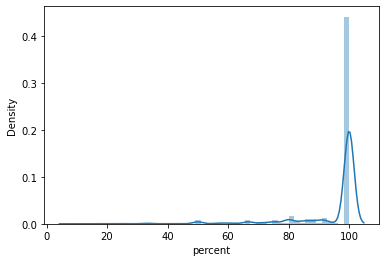

In [293]:
sns.distplot(students_info.percent)

In [294]:
# F - завершаемость курса студентом: 

# 1: =100, студент выполнил все тесты успешно и завершил курс 
# 2: 50...99, студент прошел значительную часть курса, но по каким-то причинам не сумел сдать/пересдать тесты и завершить курс (можно продлить срок сдачи или предложить перевестись на следующий поток)
# 3: 0...49, студент сдал меньше половины тестов (потерял интерес / выбрал не ту специальность, можно предложить другую специальность)

In [304]:
# средний балл по студентам

mean_score_for_student = studentAssessment_.groupby('id_student', as_index=False).agg({'score':'mean'}) \
    .rename(columns={'score':'mean_score'})
mean_score_for_student

,id_student,mean_score
0,6516,61.800000
1,8462,87.666667
2,11391,82.000000
3,23629,82.500000
4,23698,74.444444
...,...,...
23294,2698251,58.142857
23295,2698257,67.800000
23296,2698535,39.250000
23297,2698577,64.400000


In [305]:
mean_score_for_student.describe()

,id_student,mean_score
count,2.329900e+04,23299.000000
mean,7.092951e+05,72.994771
std,5.552824e+05,15.726904
min,6.516000e+03,0.000000
25%,5.053130e+05,65.000000
50%,5.897780e+05,76.000000
75%,6.451720e+05,84.279221
max,2.698588e+06,100.000000


In [306]:
mean_score_for_student.mean_score.mode()

0    80.0
Name: mean_score, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_score', ylabel='Density'>

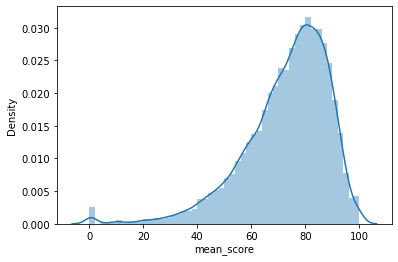

In [307]:
sns.distplot(mean_score_for_student.mean_score)

М - средний балл: 
1: 75...100, средний балл высокий, хорошая успеваемость 
2: 40...74, успеваемость пороговая или чуть выше, приемлимо
3: 0...39, плохо, успеваемость ниже пороговой, курс не завершен (ошибка выбора специальности студентом, чрезвычайные ситуации)

In [309]:
# средний срок сдачи теста

mean_date_submitted_for_student = studentAssessment_.groupby('id_student', as_index=False).agg({'date_submitted':'mean'}) \
    .rename(columns={'date_submitted':'mean_date'})
mean_date_submitted_for_student

,id_student,mean_date
0,6516,111.600000
1,8462,55.000000
2,11391,112.400000
3,23629,55.750000
4,23698,133.444444
...,...,...
23294,2698251,121.428571
23295,2698257,116.200000
23296,2698535,90.375000
23297,2698577,106.200000


In [310]:
mean_date_submitted_for_student.describe()

,id_student,mean_date
count,2.329900e+04,23299.000000
mean,7.092951e+05,101.284184
std,5.552824e+05,41.092642
min,6.516000e+03,1.000000
25%,5.053130e+05,76.250000
50%,5.897780e+05,110.500000
75%,6.451720e+05,125.750000
max,2.698588e+06,333.500000


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_date', ylabel='Density'>

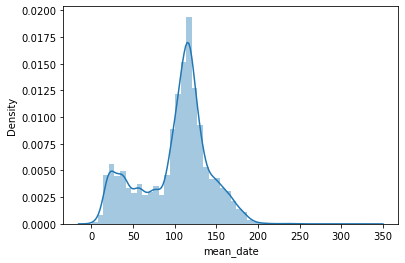

In [311]:
sns.distplot(mean_date_submitted_for_student.mean_date)

R - средний срок сдачи теста: 
1: 0...90, отличный результат, лучше большинства студентов
2: 91...140, средний результат, приемлимо, входит в большинство
3: > 141, плохой результат, хуже большинства

In [313]:
# объединим метрики

students_info_full = students_info.merge(mean_score_for_student, how='left', on='id_student') \
    .merge(mean_date_submitted_for_student, how='left', on='id_student')
students_info_full = students_info_full[['id_student','mean_score','mean_date','percent']]
students_info_full

,id_student,mean_score,mean_date,percent
0,6516,61.800000,111.600000,100.000000
1,8462,87.666667,55.000000,100.000000
2,11391,82.000000,112.400000,100.000000
3,23629,82.500000,55.750000,100.000000
4,23698,74.444444,133.444444,100.000000
...,...,...,...,...
23294,2698251,58.142857,121.428571,85.714286
23295,2698257,67.800000,116.200000,100.000000
23296,2698535,39.250000,90.375000,50.000000
23297,2698577,64.400000,106.200000,100.000000


распределим по границам и добавим данные в датафрейм

In [315]:
students_info_full.loc[students_info_full['mean_date'] > 90, 'R']   = 2
students_info_full.loc[students_info_full['mean_date'] < 140, 'R']  = 2

students_info_full.loc[students_info_full['mean_date'] >= 140, 'R'] = 3

students_info_full.loc[students_info_full['mean_date'] <= 90, 'R']  = 1

In [316]:
students_info_full.loc[students_info_full['percent'] >= 50, 'F']  = 2
students_info_full.loc[students_info_full['percent'] < 100, 'F']  = 2

students_info_full.loc[students_info_full['percent'] == 100, 'F'] = 1

students_info_full.loc[students_info_full['percent'] < 50, 'F']   = 3

In [317]:
students_info_full.loc[students_info_full['mean_score'] >= 40, 'M'] = 2
students_info_full.loc[students_info_full['mean_score'] < 75, 'M']  = 2

students_info_full.loc[students_info_full['mean_score'] >= 75, 'M'] = 1

students_info_full.loc[students_info_full['mean_score'] < 40, 'M']  = 3

In [318]:
students_info_full.head()

,id_student,mean_score,mean_date,percent,R,F,M
0,6516,61.800000,111.600000,100.0,2.0,1.0,2.0
1,8462,87.666667,55.000000,100.0,1.0,1.0,1.0
2,11391,82.000000,112.400000,100.0,2.0,1.0,1.0
3,23629,82.500000,55.750000,100.0,1.0,1.0,1.0
4,23698,74.444444,133.444444,100.0,2.0,1.0,2.0
